Note: Use this template to develop your project. Do not change the steps. For each step, you may add additional cells if needed.

#### Group Information

<!-- Group No: Cancer_6

- Member 1: Marcus Chan Jun Hao 157832
- Member 2: Chan Yee Shuen 159377
- Member 3: Aiman Hakimi Bin Mohd Nor Azmi 153153
- Member 4: Ooi Zhun Shen 159751 -->


#### Import Libraries

In [1]:
%config Completer.use_jedi=False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#### Load the dataset

In [2]:
dataset = pd.read_csv('assignment1_dataset.csv')

X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

x_0 = np.ones(shape=(X.shape[0], 1))
X = np.concatenate((x_0, X), axis=1) # introduce x_0 = 1 feature for convenience

#### Define the loss function

In [3]:
def loss_fn(y, yhat):
    """ Pass two arguments
    Arguments:
        y: responses
        yhat: predicted value
    Returns:
        loss: loss value
    """
    return np.mean(np.square(yhat - y)) / 2 # loss function used is squared loss
    

#### Define function to perform prediction

In [4]:
def predict(w,x):
    """ Pass two arguments
    Arguments:
        w: weights
        X: input features
    Returns:
        yhat: predicted values
    """
    return np.dot(x, w) # returns an m-dimensional vector
    

#### Define function for model training
Display the training loss value for each epoch of the training loop. The displayed value must be in 3 decimal places.

In [5]:
def train_model(X, y, alpha, max_epoch):
    """ Pass four arguments
    Arguments:
        X: input features
        y: responses
        alpha: learning rate
        max_epoch: maximum epochs
    Returns:
        w: estimated weights
        hist_loss: training loss history
    """
    m, n = X.shape
    w = np.random.randn(n) # initialise vector w to random values
    hist_loss = []
    
    for i in range(max_epoch):
        yhat = predict(w, X)
        training_loss = loss_fn(y, yhat)
        w -= (alpha / m) * X.T.dot(yhat - y) # X.T.dot(yhat - y) is the gradient
        print(f'Iteration {i+1}: {training_loss:.3f}')
        hist_loss.append(training_loss)
        
    return w, hist_loss

#### Split the dataset
The ratio of training and test is 8:2.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Train the model

In [7]:
w, hist_loss = train_model(X_train, y_train, 0.03, 300)

Iteration 1: 867.352
Iteration 2: 813.140
Iteration 3: 762.381
Iteration 4: 714.855
Iteration 5: 670.353
Iteration 6: 628.684
Iteration 7: 589.666
Iteration 8: 553.129
Iteration 9: 518.915
Iteration 10: 486.876
Iteration 11: 456.873
Iteration 12: 428.775
Iteration 13: 402.462
Iteration 14: 377.819
Iteration 15: 354.740
Iteration 16: 333.125
Iteration 17: 312.881
Iteration 18: 293.921
Iteration 19: 276.162
Iteration 20: 259.528
Iteration 21: 243.948
Iteration 22: 229.355
Iteration 23: 215.685
Iteration 24: 202.880
Iteration 25: 190.886
Iteration 26: 179.650
Iteration 27: 169.124
Iteration 28: 159.263
Iteration 29: 150.026
Iteration 30: 141.372
Iteration 31: 133.264
Iteration 32: 125.668
Iteration 33: 118.551
Iteration 34: 111.883
Iteration 35: 105.636
Iteration 36: 99.782
Iteration 37: 94.298
Iteration 38: 89.158
Iteration 39: 84.343
Iteration 40: 79.830
Iteration 41: 75.602
Iteration 42: 71.639
Iteration 43: 67.926
Iteration 44: 64.446
Iteration 45: 61.185
Iteration 46: 58.129
Iteratio

#### Display the estimated weights

In [8]:
print(f'Estimated weights: {w}')

Estimated weights: [ 9.58215602 11.81502217 -0.15076356 -0.09081814 36.78053625  0.14350704]


#### Display the training loss against epoch graph

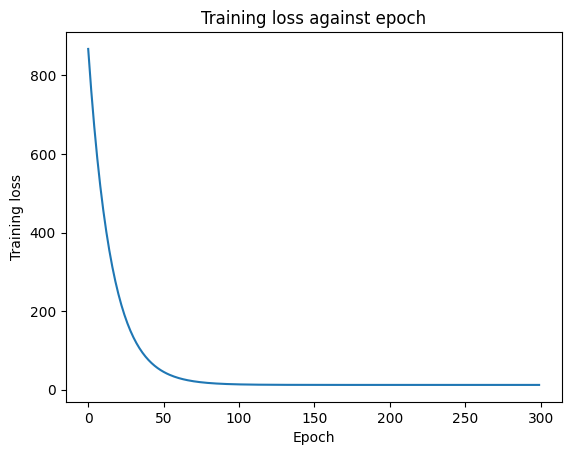

In [9]:
plt.plot(range(300), hist_loss)
plt.title('Training loss against epoch')
plt.xlabel('Epoch')
plt.ylabel('Training loss')

plt.show()

#### Predict the test set

In [10]:
y_test_pred = predict(w, X_test) # predict the test set using estimated weights

#### Display the r2 score, mean squared error and mean absolute error

In [11]:
r2_score = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

print(f'R2 score = {r2_score}')
print(f'Mean squared error = {mse}')
print(f'Mean absolute error = {mae}')

R2 score = 0.9841552850676732
Mean squared error = 26.879358273799323
Mean absolute error = 4.127549167320317
